In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold



In [80]:
def get_data(dir= 'data', split= 'train', track= 'a', language= 'ptbr'):
    
    archive = language + '.csv' if split == 'train' else language + '_' + track + '.csv'

    path = f'{dir}/{split}/track_{track}/{archive}'
    
    return pd.read_csv(path)


def get_fold(dir= 'data', split= 'train', track= 'a', language= 'ptbr', fold= 0):
    
    archive = language + '.csv' if split == 'train' else language + '_' + track + '.csv'

    path = f'validacao/data/folds_{track}/fold_{fold}.csv'
    
    return pd.read_csv(path)


In [81]:
df_track_a = get_data(split="train", track="a")
df_track_a

,id,text,Anger,Disgust,Fear,Joy,Sadness,Surprise
0,ptbr_train_track_a_00001,"minha vó me disse que era frango e eu comi, ti...",0,0,0,0,1,0
1,ptbr_train_track_a_00002,Está e a nossa deputada Benedita linda guerrei...,0,0,0,1,0,0
2,ptbr_train_track_a_00003,só falta as roupas kkkkkkkkkkk,0,0,0,1,0,0
3,ptbr_train_track_a_00004,Eu tmb. Comecei a sair de casa agora (fui pela...,0,0,0,0,1,0
4,ptbr_train_track_a_00005,Peço a Deus que nossos dirigentes tenham realm...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2221,ptbr_train_track_a_02222,Eu acho que o CAP vai surpreender hein.,0,0,0,0,0,1
2222,ptbr_train_track_a_02223,23:59 - Lula sabia de toda a corrupção no seu ...,1,0,0,0,0,0
2223,ptbr_train_track_a_02224,O Brasil precisa URGENTE de pessoas sérias e c...,1,0,0,0,0,0
2224,ptbr_train_track_a_02225,Sera que só eu acho que ta passando da hora de...,1,0,0,0,0,0


In [82]:

# Adicionar a coluna 'kfold' e inicializar com -1
df_track_a['kfold'] = -1

# Embaralhar o dataframe
df_track_a = df_track_a.sample(frac=1).reset_index(drop=True)

# Definir o número de folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Preencher a coluna 'kfold' com o número do fold
for fold, (train_idx, val_idx) in enumerate(kf.split(df_track_a)):
    df_track_a.loc[val_idx, 'kfold'] = fold

# Visualizar o resultado
df_track_a.head()

,id,text,Anger,Disgust,Fear,Joy,Sadness,Surprise,kfold
0,ptbr_train_track_a_01888,elas acha isso nois acha isso ridículo kkkkk,0,0,0,0,0,0,3
1,ptbr_train_track_a_02106,Fico feliz em saber! Você e João Gordo valem s...,0,0,0,1,0,0,4
2,ptbr_train_track_a_01362,feliz dia internacional da cerveja! em the ...,0,0,0,1,0,0,1
3,ptbr_train_track_a_01225,"Você não pode fazer nada por você mesmo, mas C...",0,0,0,1,0,0,2
4,ptbr_train_track_a_01678,acabo logo com a graça,1,0,0,0,1,0,4


In [83]:

def distrib(dataframe):

    count_ones = (dataframe.drop(columns=['id', 'text', 'kfold']) == 1).sum()

    plt.figure(figsize=(10, 6))
    count_ones.plot(kind='bar', color='orange')
    plt.title('Contagem de Valores "1" por Sentimento (Track A)', fontsize=16)
    plt.ylabel('Contagem de "1"', fontsize=12)
    plt.xlabel('Sentimentos', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

Fold: 0


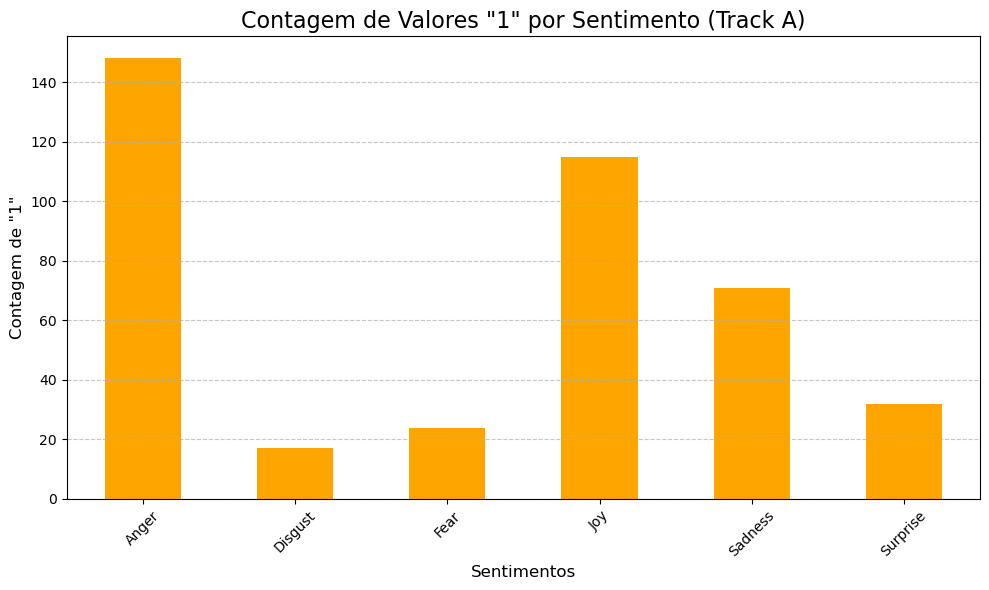

Fold: 1


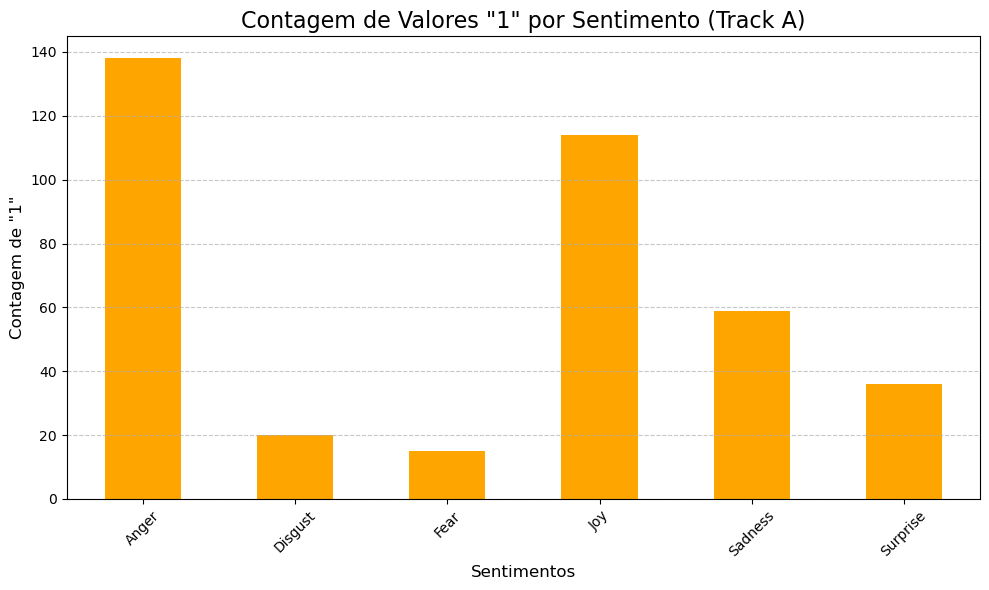

Fold: 2


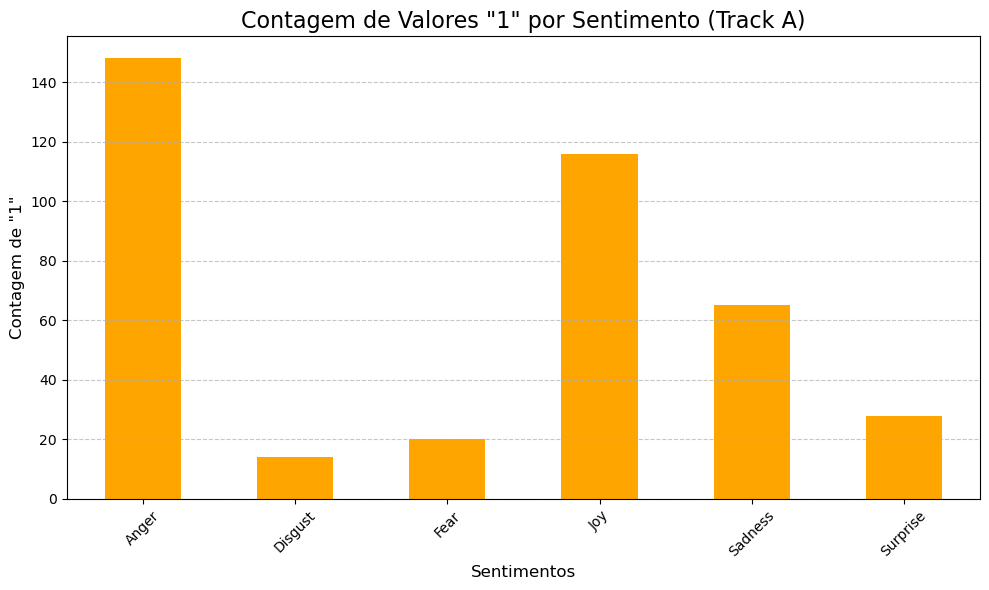

Fold: 3


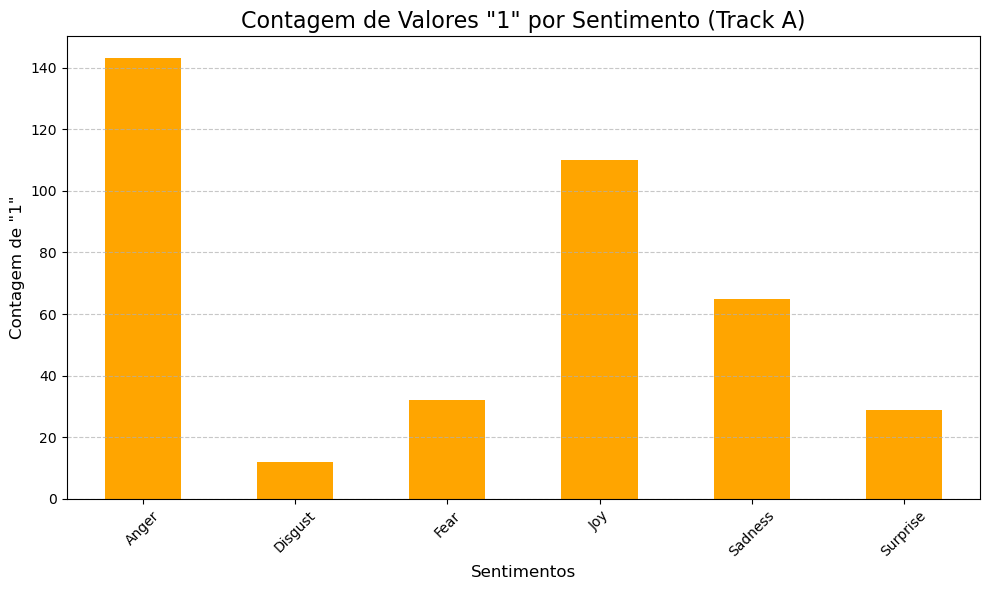

Fold: 4


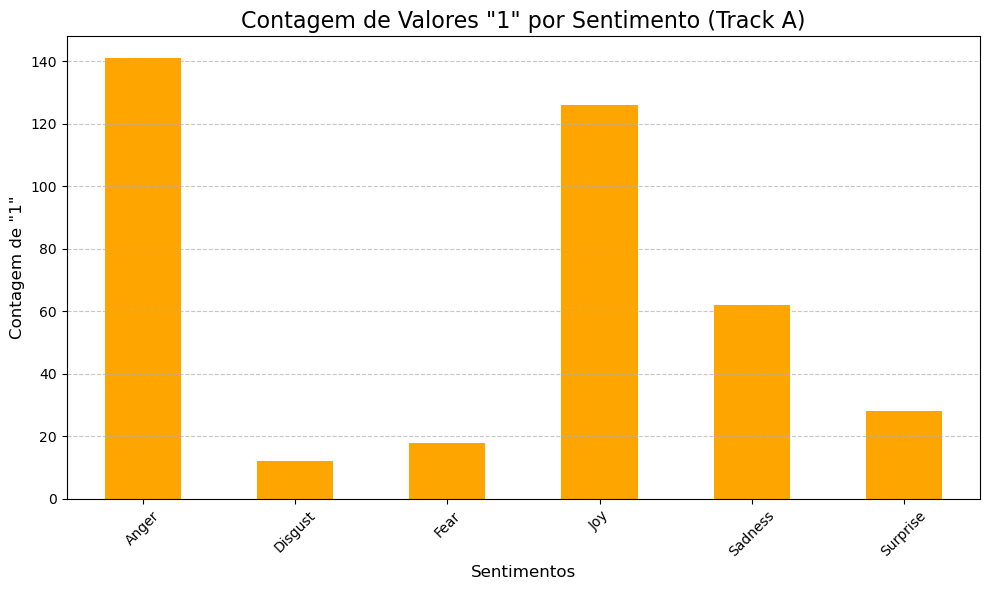

In [84]:
def folds_distrib(dataframe):
    for fold in range(5):
        print(f'Fold: {fold}')
        df_fold = dataframe[dataframe.kfold == fold]
        distrib(df_fold)

folds_distrib(df_track_a)

In [85]:
import os

path = 'validacao/data/folds_a/dataframe_folds.csv'
os.makedirs(os.path.dirname(path), exist_ok=True)

df_track_a.to_csv(path, index=False)

In [87]:
df_track_b = get_data(track='b')

df_track_b = pd.merge(df_track_b, df_track_a[['text', 'kfold']], on='text', how='inner')

In [88]:
import os

path = 'validacao/data/folds_b/dataframe_folds.csv'
os.makedirs(os.path.dirname(path), exist_ok=True)

df_track_b.to_csv(path, index=False)

In [90]:
df_track_a

,id,text,Anger,Disgust,Fear,Joy,Sadness,Surprise,kfold
0,ptbr_train_track_a_01888,elas acha isso nois acha isso ridículo kkkkk,0,0,0,0,0,0,3
1,ptbr_train_track_a_02106,Fico feliz em saber! Você e João Gordo valem s...,0,0,0,1,0,0,4
2,ptbr_train_track_a_01362,feliz dia internacional da cerveja! em the ...,0,0,0,1,0,0,1
3,ptbr_train_track_a_01225,"Você não pode fazer nada por você mesmo, mas C...",0,0,0,1,0,0,2
4,ptbr_train_track_a_01678,acabo logo com a graça,1,0,0,0,1,0,4
...,...,...,...,...,...,...,...,...,...
2221,ptbr_train_track_a_01843,"Não quero sua atenção kkkk. Mas ok, brigado.",1,0,0,0,0,0,1
2222,ptbr_train_track_a_02156,nossa a gente fica até com raiva do nada irmão,1,0,0,0,0,1,3
2223,ptbr_train_track_a_00137,&gt;O grande diferencial de um colégio não é s...,0,0,0,0,0,0,0
2224,ptbr_train_track_a_01453,cpi em tudo quanto for órgão público que deu p...,1,0,0,0,0,0,2


In [89]:
df_track_b

,id,text,Anger,Disgust,Fear,Joy,Sadness,Surprise,kfold
0,ptbr_train_track_b_00001,Essa é a democracia e liberdade que a e seu p...,1,0,0,0,0,0,4
1,ptbr_train_track_b_00002,fiz isso! vou ficar prestando atenção se o che...,0,0,0,0,0,0,0
2,ptbr_train_track_b_00003,anao meu irmao ta em casa kk lixo,1,0,0,0,1,0,4
3,ptbr_train_track_b_00004,"Mas... a pandemia vem pra ficar, meu chapa. At...",0,0,2,0,0,0,2
4,ptbr_train_track_b_00005,Não entendi o post. Está enaltecendo a invasão...,2,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...
2221,ptbr_train_track_b_02222,Vc merece muito mais,0,0,0,1,0,0,1
2222,ptbr_train_track_b_02223,"Também , maioria sem nada para fazer , aí acab...",0,0,0,0,0,0,0
2223,ptbr_train_track_b_02224,acho que chegou a hora de esquecer os erros do...,0,0,0,0,0,0,3
2224,ptbr_train_track_b_02225,mas é óbvio oq vc esperava,0,0,0,0,0,1,1
